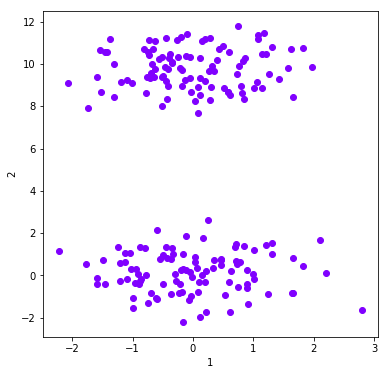

In [1]:
# Reproduce Ana Fred's Ensemble approach to 
#%matplotlib inline
import numpy as np 
import pandas as pd 
import random
from sklearn import datasets
import openensembles as oe
import matplotlib.pyplot as plt

#Set up a dataobject of samples from two Guassians 
n_samples = 200
#centers = [(0,0), (3, 6.32)] #Mahalano
centers = [(0,0), (0, 10)] #Mahalano
x, y = datasets.make_blobs(n_samples=n_samples,centers= centers,cluster_std=1)

#X, y = datasets.make_moons(n_samples=400, shuffle=True, noise=0.02, random_state=None)
df = pd.DataFrame(x)

dataObj = oe.data(df, [1,2])
dataObj.plot_data('parent')


## Plot convergence towards solution

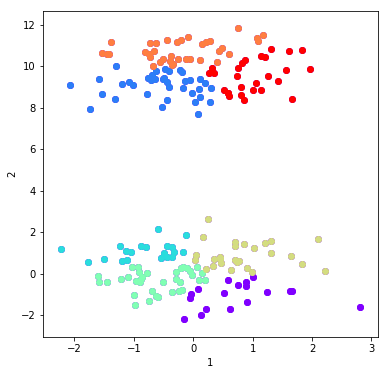

In [2]:
#Plot a single solution 
# default Scikit-learn settings, which have built in some determinism

c = oe.cluster(dataObj) 
K = 7 
name = 'kmeans'
c.cluster('parent', 'kmeans', name, K, init = 'random', n_init = 1)
dataObj.plot_data('parent', class_labels=c.labels['kmeans'])


In [5]:
# Add solutions and calculate every five
c = oe.cluster(dataObj) 
K = 14 
numIterations = 25
c_MV_arr = []
fig_arr = []
modulo = 2
for i in range(1,numIterations):
    name = 'kmeans_' + str(i)
    c.cluster('parent', 'kmeans', name, K, init = 'random', n_init = 1)
    if not i % modulo:
        c_MV_arr.append(c.finish_majority_vote(threshold=0.5))
#        fig_arr.append(dataObj.plot_data('parent', class_labels=c_MV_arr[-1].labels['majority_vote']))
        


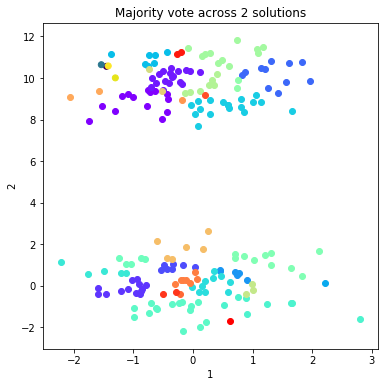

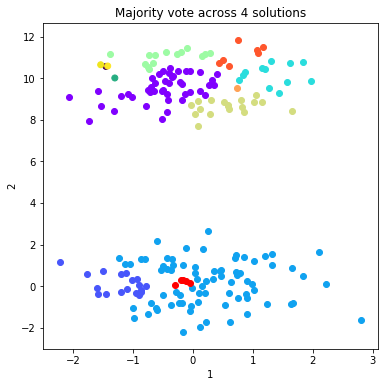

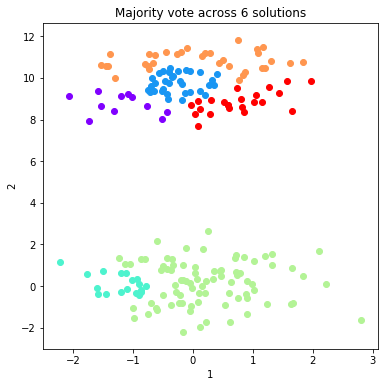

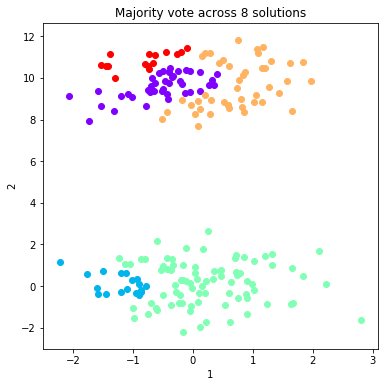

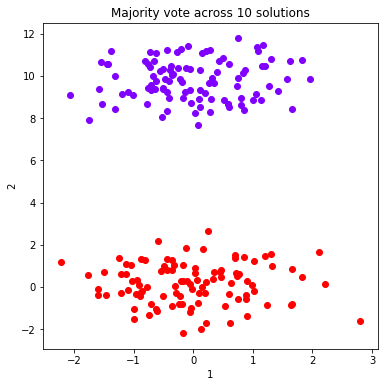

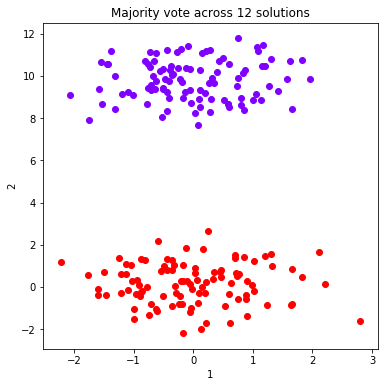

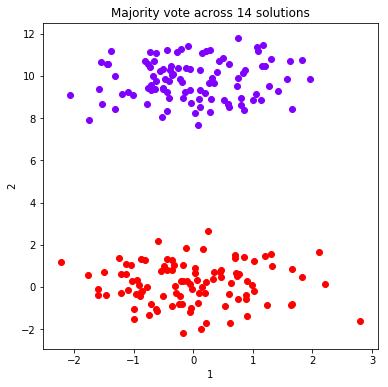

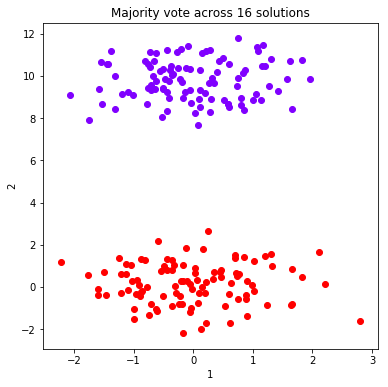

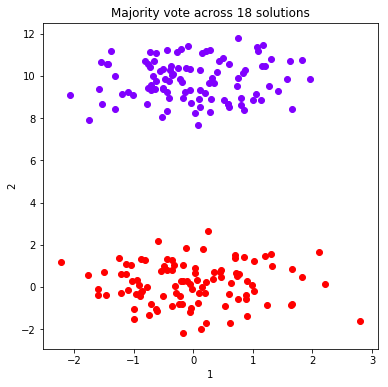

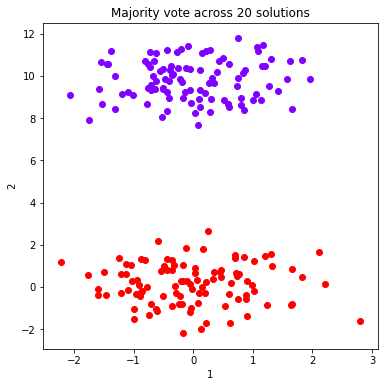

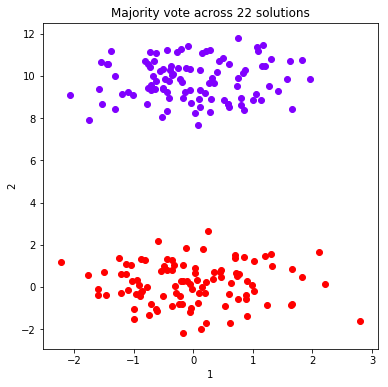

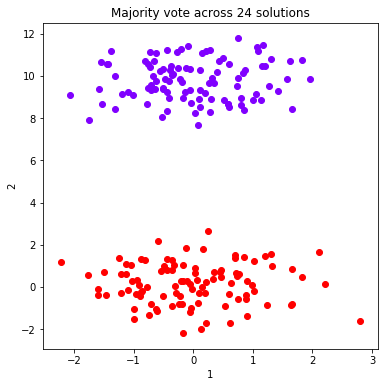

In [6]:
for ind in range(0, len(c_MV_arr)):

    fig = dataObj.plot_data('parent', class_labels=c_MV_arr[ind].labels['majority_vote'])
    plt.title('Majority vote across %d solutions'%(modulo+modulo*ind))
    plt.show()
